<div style="text-align: right; font-size: 24px; color: blue;">Mastering Principal Component Analysis: A Hands-On Tutorial</div>
<br>
<div style="text-align: right; font-size: 18px; color: green;"> PRASHANT SUNDGE</div>


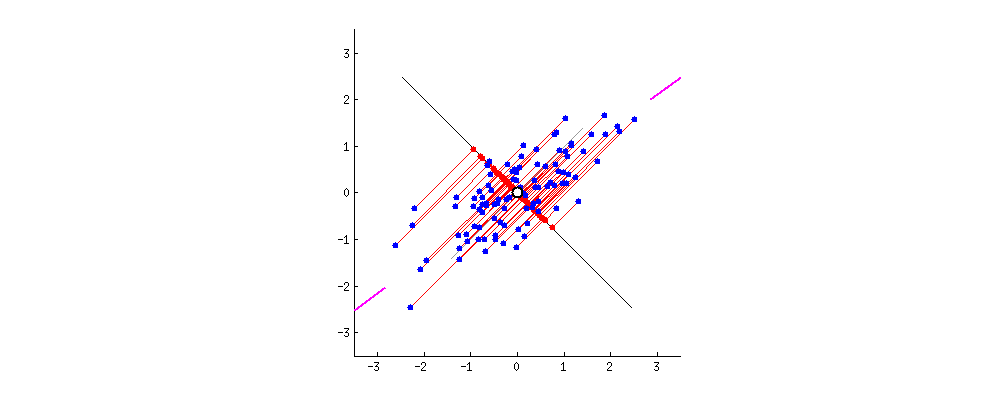

<div style="text-align: right; font-size: 14px; color: red;"> Img Source: https://i.stack.imgur.com/lNHqt.gif</div>


### Table of Contents
1. [What is PCA](#What_is_PCA)
2. [Need for PCA](#need-for-pca)
    - [Curse of Dimensionality](#curse-of-dimensionality)
    - [Multicollinearity](#multicollinearity)
3. [Understanding PCA](#understanding-pca)
    - [Variance](#variance)
    - [Orthogonality](#orthogonality)
    - [Eigenvalues and Eigenvectors](#eigenvalues-and-eigenvectors)
4. [Steps in PCA](#steps-in-pca)
    - [Standardization](#standardization)
    - [Covariance Matrix](#covariance-matrix)
    - [Eigenvalue Decomposition](#eigenvalue-decomposition)
    - [Selecting Principal Components](#selecting-principal-components)
    - [Transform Data](#transform-data)
5. [Explained Variance](#explained-variance)
    - [Explained Variance Ratio](#explained-variance-ratio)
    - [Scree Plot](#scree-plot)
6. [Practical Applications](#practical-applications)
    - [Dimensionality Reduction](#dimensionality-reduction)
    - [Noise Reduction](#noise-reduction)
    - [Data Compression](#data-compression)
    - [Anomaly Detection](#anomaly-detection)
7. [Limitations](#limitations)
    - [Loss of Interpretability](#loss-of-interpretability)
    - [Non-linear Relationships](#non-linear-relationships)
    - [Data Scaling](#data-scaling)
8. [Alternatives to PCA](#alternatives-to-pca)
    - [Non-linear Dimensionality Reduction Techniques](#non-linear-dimensionality-reduction-techniques)
    - [Feature Selection](#feature-selection)
    
9. [Practical on Datasets](#Practical-on-Datasets)

# 1. What is PCA

# Understanding Principal Component Analysis (PCA)


## Introduction to PCA - Simplified Explanation

Imagine you have a collection of data, like the measurements of various parts of a car. You've got data on the length, width, height, weight, and maybe even the horsepower of different car models. Now, you want to understand this data better, but there's a problem: too many features or dimensions to deal with. That's where PCA comes in.



## PCA as a Data Simplifier

PCA is like having a magic tool that helps you simplify your data. It takes all these different measurements and tells you which ones are most important. In other words, it helps you figure out what's really going on in your data without all the complexity.

## Reducing Complexity

The first thing PCA does is to find a new set of measurements that are related to the original ones but are much simpler. These new measurements are called "principal components." Instead of dealing with many features, you'll work with a smaller number of principal components.

## Variance and Information

PCA figures out which original measurements carry the most "information" or "variance" in your data. Think of variance as a measure of how much your data varies. So, the measurements that change a lot from one car to another are important, and PCA finds those for you.

## Orthogonality and Independence

Another cool thing about PCA is that it makes sure the principal components are not just simplified but also independent of each other. In other words, they don't carry the same information, so you avoid redundancy.

## Application in Data Science

### Why is this helpful in data science? Well, you can use PCA for various things:

- **Dimensionality Reduction:** If you have too many features, PCA helps you focus on the most crucial ones, making your analysis easier.

- **Visualization:** It can help you plot your data in a way that's easier to see patterns.

- **Noise Reduction:** If your data has some noisy measurements, PCA can clean that up.
    In a Nutshell

Think of PCA as a way to look at your data from a different, simpler angle. It helps you focus on what really matters and understand your data better, making it a powerful tool in data analysis and machine learning.



## How PCA Works

PCA works by finding the directions in the data where the variance is highest. These directions are the principal components, and they are orthogonal to each other, meaning they are uncorrelated. The first principal component captures the most variance, the second captures the second most, and so on.

## Example

Let's consider a simple example with two variables, X and Y:

| X  | Y  |
|----|----|
| 1  | 2  |
| 2  | 3  |
| 3  | 3  |
| 4  | 4  |
| 5  | 5  |

### Step 1: Standardize Data

First, we standardize the data by subtracting the mean and dividing by the standard deviation for both X and Y.

### Step 2: Calculate Covariance

Next, we calculate the covariance matrix. In this case, it is:


| 0.5 0.5 |

| 0.5 1.0 |


### Step 3: Find Eigenvalues and Eigenvectors

We find the eigenvalues and eigenvectors of the covariance matrix. In this case, we have one eigenvalue of 0.25 and an eigenvector of [1, 2].

### Step 4: Select Principal Components

The first principal component is the eigenvector [1, 2].

### Step 5: Transform Data

We can project the original data onto the first principal component. This results in a new dataset with reduced dimensionality.



<br>
<div style="text-align: right; font-size: 14px; color: Green;">Fear not, we'll delve deep below, aiming to etch PCA permanently into your understanding.</div>


# 2. Need of PCA



### Curse of Dimensionality:

The Curse of Dimensionality refers to the difficulties and challenges that arise when working with high-dimensional data. As the number of dimensions increases, several issues emerge, including increased computational complexity, sparsity of data points, and problems with visualization. These issues can make data analysis and modeling more challenging.

**Example:** To illustrate the Curse of Dimensionality, consider dataset where the number of dimensions is increased. We can generate random data points in a high-dimensional space and observe the sparsity of data points.

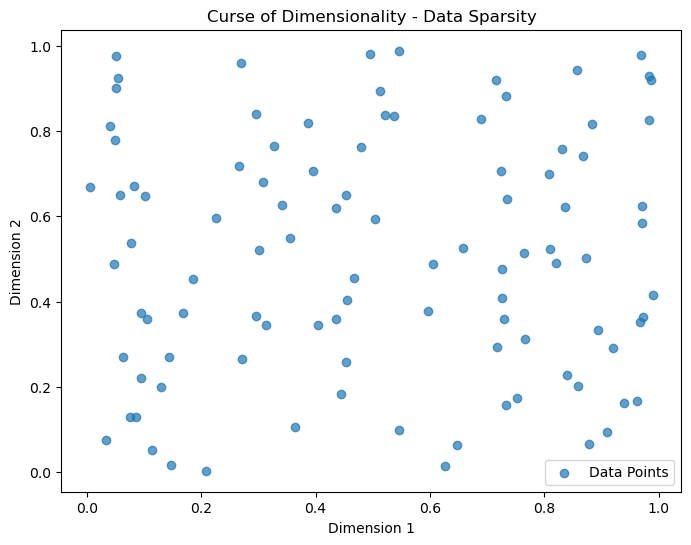

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a synthetic high-dimensional dataset
num_dimensions = 10
num_data_points = 100
data = np.random.rand(num_data_points, num_dimensions)

# Plot the sparsity of data points
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], label='Data Points', alpha=0.7)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Curse of Dimensionality - Data Sparsity')
plt.legend()
plt.show()


### Multicollinearity:
   Multicollinearity occurs when two or more features in a dataset are highly correlated, which can lead to redundancy in the data. This redundancy can complicate model interpretation and cause issues in regression analysis, such as unstable coefficient estimates.

**Example:** synthetic dataset with two highly correlated features and visualize the multicollinearity.

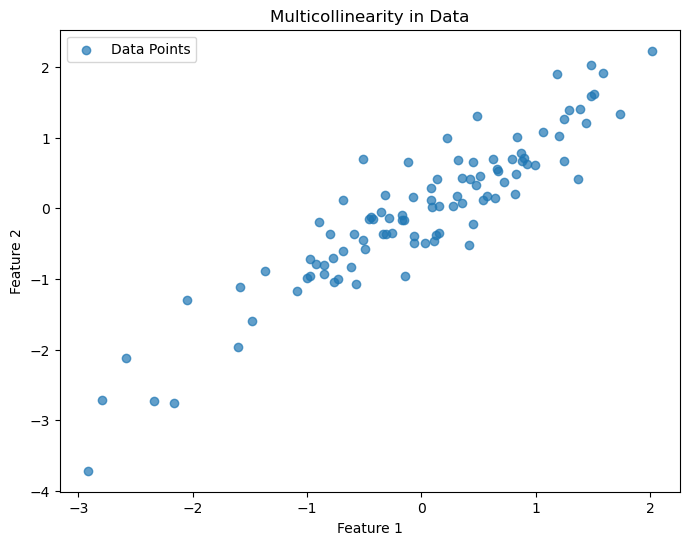

In [3]:
# Create a synthetic dataset with multicollinearity
mean = [0, 0]
cov = [[1, 0.9], [0.9, 1]]
data_multicollinear = np.random.multivariate_normal(mean, cov, 100)

# Plot the multicollinearity
plt.figure(figsize=(8, 6))
plt.scatter(data_multicollinear[:, 0], data_multicollinear[:, 1], label='Data Points', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Multicollinearity in Data')
plt.legend()
plt.show()


## Visualization:
   Visualization is crucial for understanding data. However, in high-dimensional spaces, it becomes challenging to visualize  the data directly. PCA can be used to reduce the dimensions and make data visualization more feasible.
    
**Example:** lower-dimensional space using PCA for dimensionality reduction.

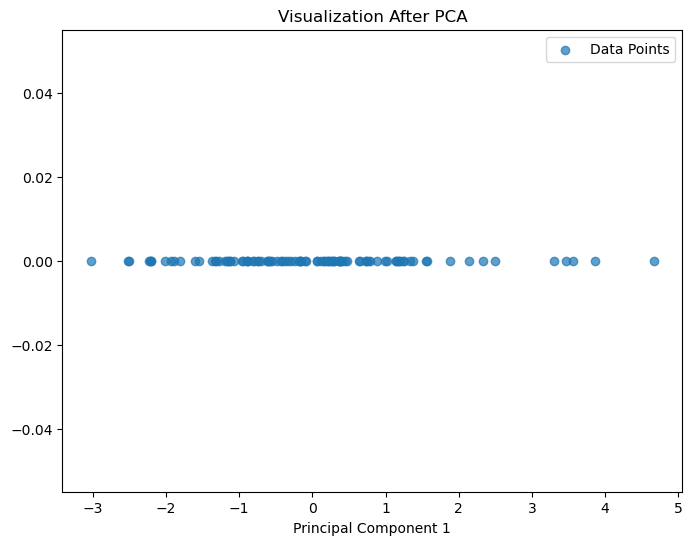

In [4]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction (from 2D to 1D)
pca = PCA(n_components=1)
data_pca = pca.fit_transform(data_multicollinear)

# Plot the reduced-dimensional data
plt.figure(figsize=(8, 6))
plt.scatter(data_pca, np.zeros(data_pca.shape[0]), label='Data Points', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.title('Visualization After PCA')
plt.legend()
plt.show()


# 3. Understanding PCA

### 1. Variance:

PCA aims to maximize variance along the new principal components. The idea is to capture as much of the data's variability as possible in a reduced-dimensional space. To demonstrate this concept, let's create a simple 2D dataset and visualize its variance.

**Variance** is a statistical measure that quantifies the spread or dispersion of a dataset. In the context of Principal Component Analysis (PCA), variance is a crucial concept as PCA aims to maximize the variance along its principal components, ensuring that the most important information is retained while reducing dimensionality.


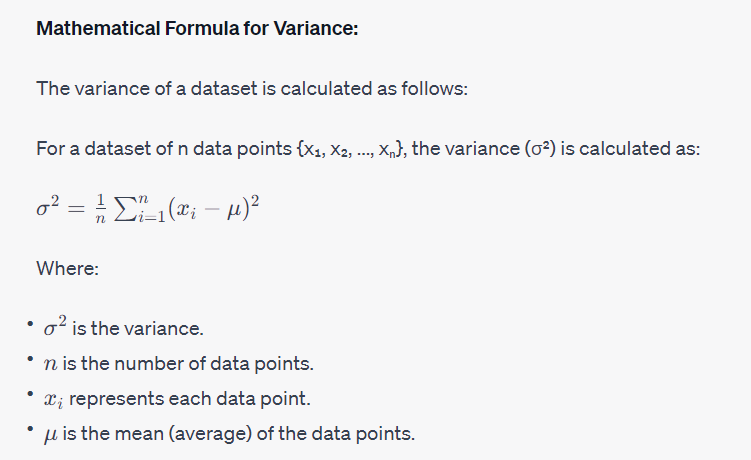

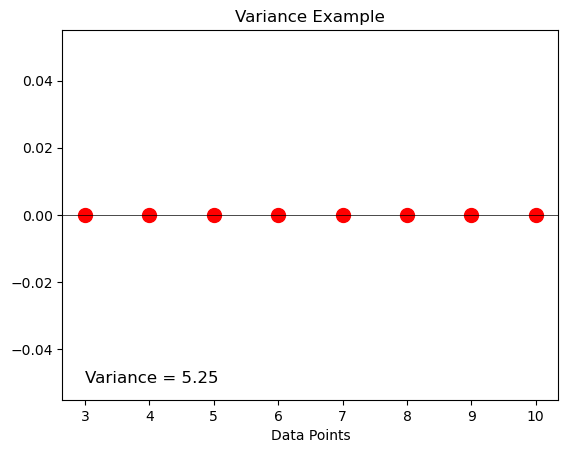

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Example dataset
data = np.array([3, 4, 5, 6, 7, 8, 9, 10])

# Calculate variance
variance = np.var(data)

# Plot the data and variance
plt.plot(data, np.zeros_like(data), 'ro', markersize=10)
plt.xlabel('Data Points')
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Variance Example')
plt.text(3, -0.05, f'Variance = {variance:.2f}', fontsize=12)
plt.show()


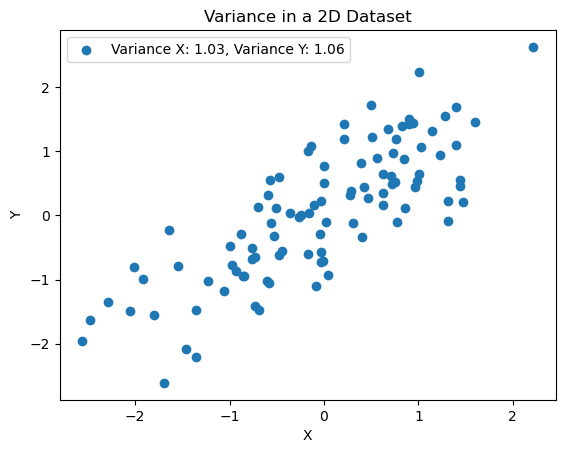

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 2D dataset with some variance
np.random.seed(0)
data = np.random.multivariate_normal([0, 0], [[1, 0.8], [0.8, 1]], 100)

# Calculate the variance along each axis
variance_x = np.var(data[:, 0])
variance_y = np.var(data[:, 1])

# Plot the dataset
plt.scatter(data[:, 0], data[:, 1,], label=f'Variance X: {variance_x:.2f}, Variance Y: {variance_y:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Variance in a 2D Dataset')
plt.show()


### 2.Orthogonality 

is a fundamental concept in Principal Component Analysis (PCA). In the context of PCA, it refers to the property that principal components are mutually perpendicular or uncorrelated with each other. This property ensures that each principal component captures a unique and independent source of variation in the data, making PCA a powerful dimensionality reduction technique.

Mathematically, orthogonality between two vectors can be represented as follows:

For two vectors u and v, they are orthogonal if their dot product (inner product) is equal to zero:

u⋅v=0

Now, let's provide an example to illustrate orthogonality with code to create plots showing variance:

**Example:** Orthogonality in PCA

Suppose we have a dataset in 2D with two features, and we want to find the principal components that capture the maximum variance while being orthogonal to each other.

In this example, we first generate a 2D dataset and calculate the covariance matrix. Then, we find the eigenvalues and eigenvectors of the covariance matrix, which represent the principal components. The dot product between PC1 and PC2 is calculated, and as expected in a PCA, it is close to zero, indicating orthogonality.

The plot shows the dataset, along with the first and second principal components, demonstrating that they are orthogonal to each other. This is a crucial property of PCA because it allows the principal components to capture distinct and independent patterns in the data.

Dot Product between PC1 and PC2: 0.0


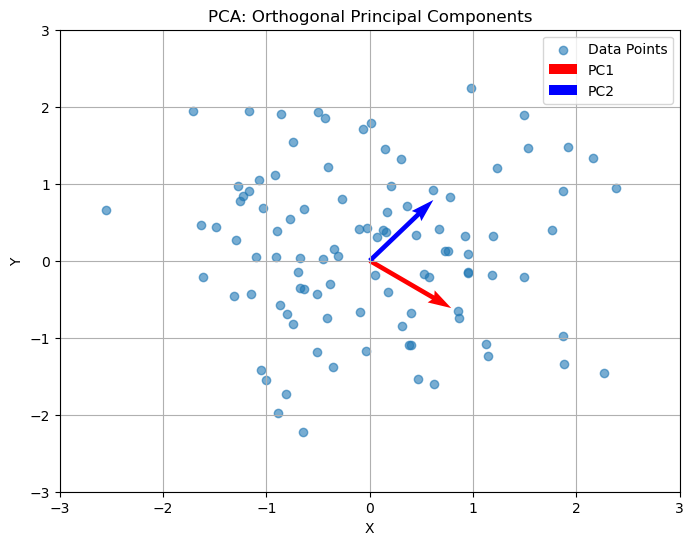

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create an example dataset
np.random.seed(0)
data = np.random.randn(100, 2)  # A 2D dataset with 100 data points

# Calculate the covariance matrix
cov_matrix = np.cov(data, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Principal components
pc1 = eigenvectors[:, 0]  # First principal component
pc2 = eigenvectors[:, 1]  # Second principal component

# Check orthogonality by calculating the dot product
dot_product = np.dot(pc1, pc2)

# Plot the dataset and principal components
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], label='Data Points', alpha=0.6)
plt.quiver(0, 0, pc1[0], pc1[1], angles='xy', scale_units='xy', scale=1, color='r', label='PC1')
plt.quiver(0, 0, pc2[0], pc2[1], angles='xy', scale_units='xy', scale=1, color='b', label='PC2')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('PCA: Orthogonal Principal Components')
plt.legend()
plt.grid()

# Print the dot product to demonstrate orthogonality
print("Dot Product between PC1 and PC2:", dot_product)

plt.show()


### 3. Eigenvalues and Eigenvectors

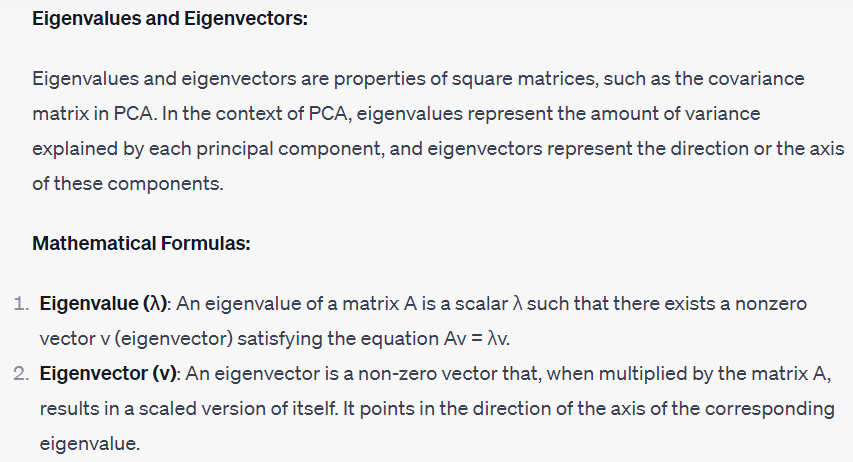
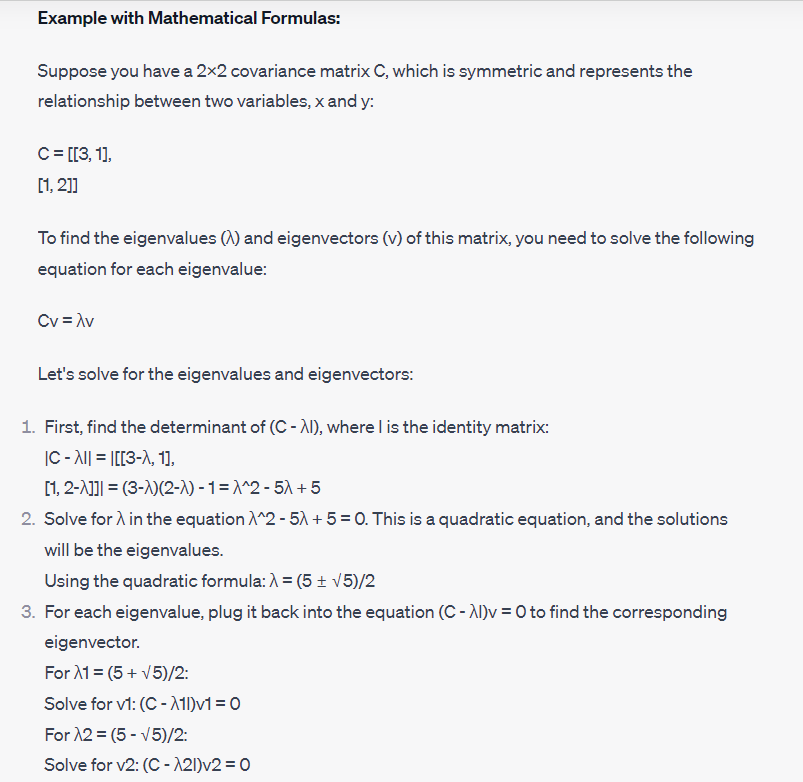

In this code, we calculate the variance explained by each eigenvalue and plot it. It helps you see how much of the total variance is captured by each principal component.

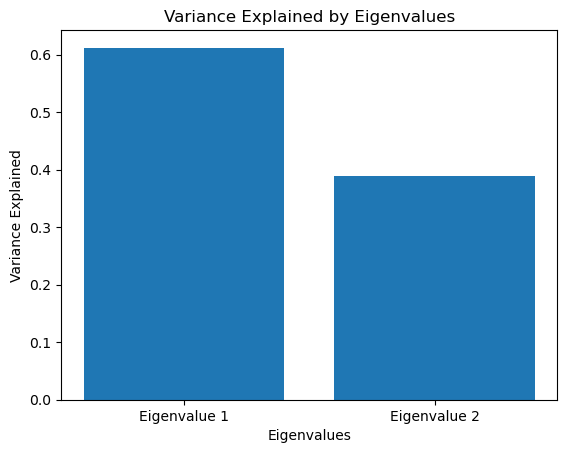

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Eigenvalues
eigenvalues = np.array([5 + np.sqrt(5) / 2, 5 - np.sqrt(5) / 2])

# Variance explained by each eigenvalue
explained_variance = eigenvalues / np.sum(eigenvalues)

# Plot the variance explained by each eigenvalue
plt.bar(['Eigenvalue 1', 'Eigenvalue 2'], explained_variance)
plt.xlabel('Eigenvalues')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Eigenvalues')
plt.show()


# 4. Steps in PCA

### 1. Standardization:

    Data is often standardized to have a mean of 0 and a standard deviation of 1 to ensure that all variables contribute equally to PCA.

**Example:**
Suppose you have a dataset with two features, "A" and "B." Standardization involves subtracting the mean and dividing by the standard deviation for each feature.

**Example 1.**

In [12]:
import numpy as np

# Sample dataset
data = np.array([[1.2, 2.3, 3.4],
                 [4.5, 5.6, 6.7],
                 [7.8, 8.9, 9.0]])

# Calculate the mean and standard deviation for each feature
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

# Standardize the data
standardized_data = (data - mean) / std

print("Original Data:")
print(data)
print("\nStandardized Data:")
print(standardized_data)


Original Data:
[[1.2 2.3 3.4]
 [4.5 5.6 6.7]
 [7.8 8.9 9. ]]

Standardized Data:
[[-1.22474487e+00 -1.22474487e+00 -1.29080434e+00]
 [ 0.00000000e+00 -3.29633929e-16  1.45034196e-01]
 [ 1.22474487e+00  1.22474487e+00  1.14577015e+00]]


**Example 2.**


In [14]:
from sklearn.preprocessing import StandardScaler

# Sample dataset
data = np.array([[1.2, 2.3, 3.4],
                 [4.5, 5.6, 6.7],
                 [7.8, 8.9, 9.0]])

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data)

print("Original Data:")
print(data)
print("\nStandardized Data:")
print(standardized_data)


Original Data:
[[1.2 2.3 3.4]
 [4.5 5.6 6.7]
 [7.8 8.9 9. ]]

Standardized Data:
[[-1.22474487e+00 -1.22474487e+00 -1.29080434e+00]
 [ 0.00000000e+00 -3.29633929e-16  1.45034196e-01]
 [ 1.22474487e+00  1.22474487e+00  1.14577015e+00]]


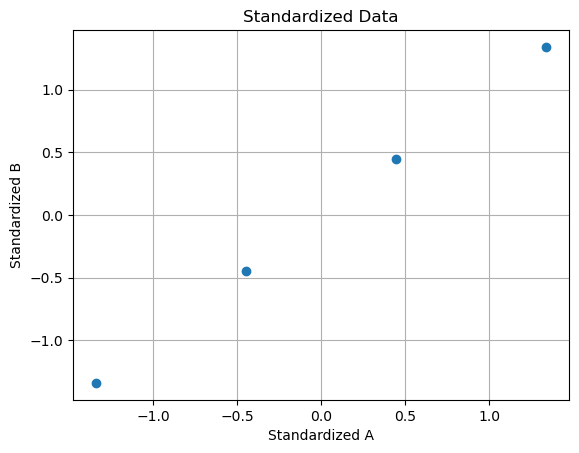

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Create an example dataset
data = np.array([[2, 4], [3, 6], [1, 2], [4, 8]])

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Plot the standardized data
plt.scatter(data_standardized[:, 0], data_standardized[:, 1])
plt.xlabel('Standardized A')
plt.ylabel('Standardized B')
plt.title('Standardized Data')
plt.grid()
plt.show()


### 2. Covariance Matrix:

Calculate the covariance matrix of the standardized data.

**Example:**
Let's calculate and visualize the covariance matrix of the standardized data.

In [15]:
# Calculate the covariance matrix
cov_matrix = np.cov(data_standardized, rowvar=False)

# Display the covariance matrix
cov_matrix


array([[1.33333333, 1.33333333],
       [1.33333333, 1.33333333]])

In [16]:
import numpy as np

# Standardized data
standardized_data = np.array([[0.26726124, -1.33630621, -1.06904497],
                             [-1.06904497, 0.26726124, 1.60330645],
                             [1.06904497, 1.06904497, -0.53452248]])

# Calculate the covariance matrix
covariance_matrix = np.cov(standardized_data, rowvar=False)

print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
[[ 1.16666667  0.25       -1.28556315]
 [ 0.25        1.5         0.64282227]
 [-1.28556315  0.64282227  1.99958149]]


### 3. Eigenvalue Decomposition

Find the eigenvalues and eigenvectors of the covariance matrix.

Example:
We will compute the eigenvalues and eigenvectors of the covariance matrix from the previous step.

The eigenvalues represent the variance explained by each principal component, and the eigenvectors define the direction of those components.

In [17]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display eigenvalues and eigenvectors
eigenvalues, eigenvectors


(array([2.66666667, 0.        ]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

**EXAMPLE 2.**

In [18]:
import numpy as np

# Covariance matrix (already standardized)
covariance_matrix = np.array([[1.0, 0.5, 0.3],
                             [0.5, 1.0, 0.2],
                             [0.3, 0.2, 1.0]])

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[1.68390863 0.48716053 0.82893084]

Eigenvectors:
[[ 0.64655665  0.7383939  -0.19167408]
 [ 0.60759268 -0.65036916 -0.45590689]
 [ 0.46129777 -0.17830987  0.86914323]]


### 4. Selecting Principal Components:

Sort the eigenvalues in descending order and select the top k eigenvalues to form k principal components, where k is the desired number of dimensions.

**Example:**
Suppose you want to reduce the data to one dimension (k=1). You can select the top eigenvalue and its corresponding eigenvector.


In [19]:
# Sort eigenvalues in descending order
eigenvalue_order = np.argsort(eigenvalues)[::-1]
top_k = 1  # Number of principal components to keep

# Select the top k eigenvalues and eigenvectors
selected_eigenvalues = eigenvalues[eigenvalue_order[:top_k]]
selected_eigenvectors = eigenvectors[:, eigenvalue_order[:top_k]]

# Display the selected eigenvalues and eigenvectors
selected_eigenvalues, selected_eigenvectors


(array([1.68390863]),
 array([[0.64655665],
        [0.60759268],
        [0.46129777]]))

**Example 2.**

In [22]:
import numpy as np

# Covariance matrix (already standardized)
covariance_matrix = np.array([[1.0, 0.5, 0.3],
                             [0.5, 1.0, 0.2],
                             [0.3, 0.2, 1.0]])

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top k eigenvalues and eigenvectors
k = 2  # Replace with your desired number of dimensions
top_k_eigenvalues = eigenvalues[:k]
top_k_eigenvectors = eigenvectors[:, :k]

print("Top {} Eigenvalues:".format(k))
print(top_k_eigenvalues)
print("\nTop {} Eigenvectors:".format(k))
print(top_k_eigenvectors)


Top 2 Eigenvalues:
[1.68390863 0.82893084]

Top 2 Eigenvectors:
[[ 0.64655665 -0.19167408]
 [ 0.60759268 -0.45590689]
 [ 0.46129777  0.86914323]]


### 5. Transform Data:

Project the original data onto the new principal components to obtain a reduced-dimensional dataset.

**Example:**
Now, we'll project the original data onto the selected principal component to reduce the dimensionality.
The reduced data retains the most significant information along the selected principal component.

In [23]:
import numpy as np

# Original data
original_data = np.array([[1.2, 2.3, 3.4],
                         [4.5, 5.6, 6.7],
                         [7.8, 8.9, 9.0]])

# Covariance matrix (already standardized)
covariance_matrix = np.array([[1.0, 0.5, 0.3],
                             [0.5, 1.0, 0.2],
                             [0.3, 0.2, 1.0]])

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top k eigenvalues and eigenvectors
k = 2  # Replace with your desired number of dimensions
top_k_eigenvalues = eigenvalues[:k]
top_k_eigenvectors = eigenvectors[:, :k]

# Project the original data onto the new principal components
reduced_data = np.dot(original_data, top_k_eigenvectors)

print("Original Data:")
print(original_data)
print("\nReduced-Dimensional Data:")
print(reduced_data)


Original Data:
[[1.2 2.3 3.4]
 [4.5 5.6 6.7]
 [7.8 8.9 9. ]]

Reduced-Dimensional Data:
[[ 3.74174357  1.67649224]
 [ 9.40271901  2.40764771]
 [14.60239667  2.26965994]]


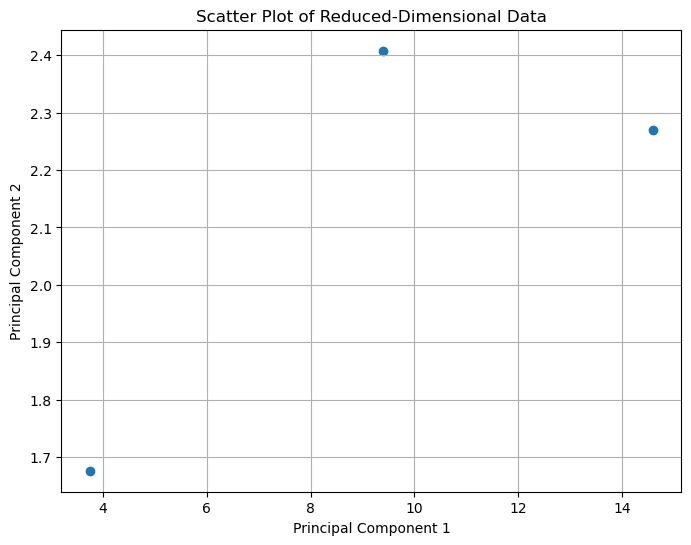

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Original data
original_data = np.array([[1.2, 2.3, 3.4],
                         [4.5, 5.6, 6.7],
                         [7.8, 8.9, 9.0]])

# Covariance matrix (already standardized)
covariance_matrix = np.array([[1.0, 0.5, 0.3],
                             [0.5, 1.0, 0.2],
                             [0.3, 0.2, 1.0]])

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top 2 eigenvalues and eigenvectors
k = 2  # Reduce to 2 dimensions
top_k_eigenvalues = eigenvalues[:k]
top_k_eigenvectors = eigenvectors[:, :k]

# Project the original data onto the new principal components
reduced_data = np.dot(original_data, top_k_eigenvectors)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title("Scatter Plot of Reduced-Dimensional Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


**Explained Variance Ratio:** The explained variance ratio calculates the proportion of variance explained by each principal component. This helps in determining how much information is retained.

**Scree Plot:** A scree plot shows the eigenvalues in descending order, aiding in the decision of how many principal components to keep based on the explained variance.

Here are the steps:
1. Calculate the eigenvalues and eigenvectors of the covariance matrix and sort them in descending order.
2. Calculate the explained variance ratio by dividing each eigenvalue by the sum of all eigenvalues. This ratio tells us how much variance each principal component explains.
3. Create a scree plot to visualize the explained variance ratio for each principal component. This plot assists in deciding how many principal components to retain based on the proportion of variance explained by each component.


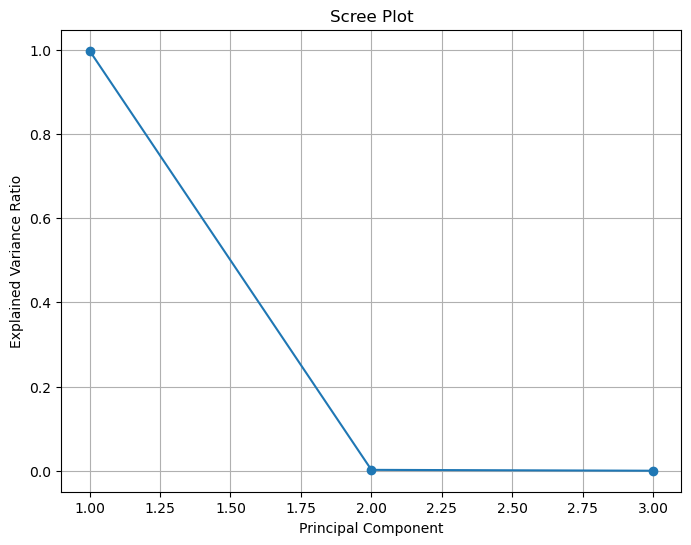

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Original data
original_data = np.array([[1.2, 2.3, 3.4],
                         [4.5, 5.6, 6.7],
                         [7.8, 8.9, 9.0]])

# Covariance matrix (already standardized)
covariance_matrix = np.cov(original_data, rowvar=False)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Create a scree plot to visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()



# 7. Practical Applications:

- **Dimensionality Reduction:** PCA is primarily used for dimensionality reduction, which is valuable for feature selection and data preprocessing.

- **Noise Reduction:** PCA helps filter out noise in data by retaining only the most important principal components.

- **Data Compression:** PCA can compress data while preserving crucial information.

- **Anomaly Detection:** In some cases, anomalies can be detected by identifying data points that deviate from the reduced-dimension representation.


# 8. Limitations:

- **Loss of Interpretability:** One of the primary limitations of PCA is that after transforming the original features into principal components, the new components might not have straightforward interpretability. This means that it can be challenging to understand the meaning of these new dimensions in the context of the original data. While PCA is excellent for dimensionality reduction and capturing variance, it may not provide human-readable insights into the data.

- **Non-linear Relationships:** PCA is most effective when the relationships between variables are primarily linear. If the data contains complex, non-linear structures, PCA may not capture these relationships accurately. In such cases, non-linear dimensionality reduction techniques like t-SNE or Isomap might be more suitable.

- **Data Scaling:** PCA is sensitive to the scale of the data. If the features have different units or scales, PCA may give more weight to features with larger scales. Therefore, it's important to standardize or normalize the data before applying PCA to ensure that all features are on a similar scale. Failure to do so may lead to biased results and affect the performance of PCA.

These limitations should be considered when applying PCA to a dataset. Understanding the nature of the data and the goals of the analysis is crucial in deciding whether PCA is the appropriate dimensionality reduction technique or whether other methods should be considered.


# 9. Alternatives to PCA:

- **Non-linear Dimensionality Reduction Techniques:** When dealing with data that contains complex non-linear relationships, PCA may not be the most suitable approach. In such cases, non-linear dimensionality reduction techniques can be employed. Two commonly used methods are:

    - **t-SNE (t-distributed Stochastic Neighbor Embedding):** t-SNE is a powerful non-linear dimensionality reduction technique that excels at capturing complex non-linear structures in data. It works by modeling pairwise similarities between data points in high-dimensional space and a lower-dimensional space. It is often used for visualizing high-dimensional data in two or three dimensions, making it valuable for data exploration and visualization.

    - **Isomap (Isometric Mapping):** Isomap is another non-linear dimensionality reduction technique that focuses on preserving geodesic distances between data points in a lower-dimensional space. It constructs a graph connecting data points and uses this graph to approximate the true distances. Isomap is useful for data that lies on or near a low-dimensional manifold.

- **Feature Selection:** In some cases, instead of dimensionality reduction, it may be more appropriate to perform feature selection. Feature selection involves choosing a subset of the most relevant features from the original dataset while discarding less informative ones. Feature selection methods can include filter methods (based on statistical tests), wrapper methods (using machine learning models for evaluation), and embedded methods (integrating feature selection with model training). Feature selection can be advantageous when there is a clear understanding of the importance of specific features in solving a particular problem, and when interpretability of the selected features is critical.

These alternative techniques provide options for addressing specific challenges in data analysis, such as non-linearity and feature relevance, which may not be effectively handled by PCA. The choice of method depends on the nature of the data, the goals of the analysis, and the specific requirements of the problem at hand.


# 9. Practical on Datasets

In [137]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_absolute_error

# plotly
import plotly.graph_objs as go     

# PCA Libraries 
from sklearn.decomposition import PCA

# Load Dataset 
from sklearn.datasets import load_digits



In [2]:
data = pd.read_csv("PCA_train.csv")


In [3]:
data.shape

(4459, 4993)

In [4]:
data.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


- **target** is our target variable where we will predict 

# Before Appling PCA will Predict the dataset with Linear Regression and Decision Tree

In [8]:
y=data['target']
X=data.drop(['target'], axis=1)

# Will Drop ID columns 

In [16]:
X=X.drop(columns='ID', axis=1)

In [18]:
X.shape

(4459, 4991)

In [19]:
print(y.shape)
print(X.shape)

(4459,)
(4459, 4991)


# Train Test Split

In [28]:
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=143)

# Linear Regression Model 

In [29]:
linear_regression_pipeline= Pipeline([('scale', StandardScaler()), ('linear_regression', LinearRegression()) ])

In [30]:
#fit the model 
linear_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [31]:
linear_reg_predict=linear_regression_pipeline.predict(X_test)

In [47]:
linear_reg_msc=mean_squared_error(y_test,linear_reg_predict)
print(f"Linear Regression Model Mean Squared Error :{linear_reg_msc}")
linear_reg_r2=r2_score(y_test,linear_reg_predict)
print(f"Linear Regression Model R2 Score \t   :{linear_reg_r2}")
linear_reg_sqrt=np.sqrt(linear_reg_msc)
print(f"Linear Regression Model Squar root  \t   :{linear_reg_sqrt}")
linear_reg_mae=mean_absolute_error(y_test,linear_reg_predict)
print(f"Linear Regression Model absolute error \t   :{linear_reg_mae}")

Linear Regression Model Mean Squared Error :4.702501675675455e+40
Linear Regression Model R2 Score 	   :-7.30961968862773e+26
Linear Regression Model Squar root  	   :2.1685252305830927e+20
Linear Regression Model absolute error 	   :1.0747398158916389e+19


# Dicision Tree Regressior Model

In [55]:
decision_tree_pipeline = Pipeline([
    ('decision_tree', DecisionTreeRegressor(max_depth=3))
])

In [56]:
decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('decision_tree', DecisionTreeRegressor(max_depth=3))])

In [57]:
decision_pred=decision_tree_pipeline.predict(X_test)

In [61]:
decision_reg_msc=mean_squared_error(y_test,decision_pred)
print(f"decision Tree Regression Model Mean Squared Error :{decision_reg_msc}")
decision_reg_r2=r2_score(y_test,decision_pred)
print(f"decision Tree Regression Model R2 Score \t   :{decision_reg_r2}")
decision_reg_sqrt=np.sqrt(linear_reg_msc)
print(f"decision Tree Regression Model Squar root  \t   :{decision_reg_sqrt}")
decision_reg_mae=mean_absolute_error(y_test,decision_pred)
print(f"decision Tree Regression Model absolute error \t   :{decision_reg_mae}")

decision Tree Regression Model Mean Squared Error :60724301371377.57
decision Tree Regression Model R2 Score 	   :0.05609486291436827
decision Tree Regression Model Squar root  	   :2.1685252305830927e+20
decision Tree Regression Model absolute error 	   :5525495.102184522


# Apply PCA on Dataset

### perform PCA on X (Standardized Feature )

## data Standardization

In [63]:
scaler=StandardScaler()

In [64]:
X_scale=scaler.fit_transform(X)

In [68]:
print(X_scale)
print(X_scale.shape)

[[-0.03764565 -0.02163947 -0.04688961 ... -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ... -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ... -0.07234203 -0.05636327
  -0.12585201]
 ...
 [-0.03764565 -0.02163947 -0.04688961 ... -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ... -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ... -0.07234203 -0.05636327
  -0.12585201]]
(4459, 4991)


In [69]:
pca= PCA(n_components=0.80, random_state=0).fit(X_scale)

In [70]:
#explained variance 
var = np.cumsum(np.round(a=pca.explained_variance_ratio_,decimals=3) * 100 )

In [91]:
fig= go.Figure()
fig.add_trace(trace =go.Scatter(x=list(range(1000)),
                              y=var,
                              name="Cumulative Explained Variance ",
                              mode='lines+markers',
                              line=dict(color='royalblue', width=2),
                              marker=dict(color='darkorange', size=5)
                               ))
#layout with cosmetics
fig.update_layout(height=500,
                width=1000,
                title_text ='PCA Analysis',
                title=0.5,
                xaxis_title='Number of components',
                yaxis_title='Explained Variance %',
                
                yaxis_gridcolor='lightgray',
                font=dict(family='Arial', size=12, color='black'),
                 )
fig.update_traces(showlegend=True)
fig.show()

In [94]:
pca=PCA(n_components=600, random_state=0)
X_pca=pca.fit_transform(X_scale)
print(f'Before PCA \t :{X_scale.shape}')
print(f'After PCA \t :{X_pca.shape}')


Before PCA 	 :(4459, 4991)
After PCA 	 :(4459, 600)


In [98]:
X_pca_train,X_pca_test, y_pca_train,y_pca_test=train_test_split(X_pca, y,test_size=0.30,random_state=143)

In [99]:
print(f'X_pca_train \t :{X_pca_train.shape}')
print(f'y_pca_train \t :{y_pca_train.shape}')
print(f'X_pca_test \t :{X_pca_test.shape}')
print(f'y_pca_test \t :{y_pca_test.shape}')


X_pca_train 	 :(3121, 600)
y_pca_train 	 :(3121,)
X_pca_test 	 :(1338, 600)
y_pca_test 	 :(1338,)


# Decision Tree Model On PCA Dataset

In [100]:
decision_tree_pipeline.fit(X_pca_train,y_pca_train)

Pipeline(steps=[('decision_tree', DecisionTreeRegressor(max_depth=3))])

In [101]:
predict_pca=decision_tree_pipeline.predict(X_pca_test,)

# PCA Decision Tree Metrics

In [112]:
pca_reg_msc=mean_squared_error(y_pca_test,predict_pca)
print(f"PCA decision Tree Regression Model Mean Squared Error \t   :{pca_reg_msc}")
pca_reg_r2=r2_score(y_pca_test,predict_pca)
print(f"PCA decision Tree Regression Model R2 Score \t\t   :{pca_reg_r2}")
pca_reg_sqrt=np.sqrt(linear_reg_msc)
print(f"PCA decision Tree Regression Model Squar root  \t\t   :{pca_reg_sqrt}")
pca_reg_mae=mean_absolute_error(y_pca_test,predict_pca)
print(f"PCA decision Tree Regression Model absolute error \t   :{pca_reg_mae}")

PCA decision Tree Regression Model Mean Squared Error 	   :57261046251032.63
PCA decision Tree Regression Model R2 Score 		   :0.10992807672343707
PCA decision Tree Regression Model Squar root  		   :2.1685252305830927e+20
PCA decision Tree Regression Model absolute error 	   :5352459.585941957


# Decision Tree Metrics without PCA

In [113]:
decision_reg_msc=mean_squared_error(y_test,decision_pred)
print(f"decision Tree Regression Model Mean Squared Error :{decision_reg_msc}")
decision_reg_r2=r2_score(y_test,decision_pred)
print(f"decision Tree Regression Model R2 Score \t   :{decision_reg_r2}")
decision_reg_sqrt=np.sqrt(linear_reg_msc)
print(f"decision Tree Regression Model Squar root  \t   :{decision_reg_sqrt}")
decision_reg_mae=mean_absolute_error(y_test,decision_pred)
print(f"decision Tree Regression Model absolute error \t   :{decision_reg_mae}")

decision Tree Regression Model Mean Squared Error :60724301371377.57
decision Tree Regression Model R2 Score 	   :0.05609486291436827
decision Tree Regression Model Squar root  	   :2.1685252305830927e+20
decision Tree Regression Model absolute error 	   :5525495.102184522


In [116]:
# Load the Digit dataset
digits = load_digits()

# Get the data (features) and target labels
X = digits.data
y = digits.target


In [129]:
X_digit=pd.DataFrame(X)
X_digit.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


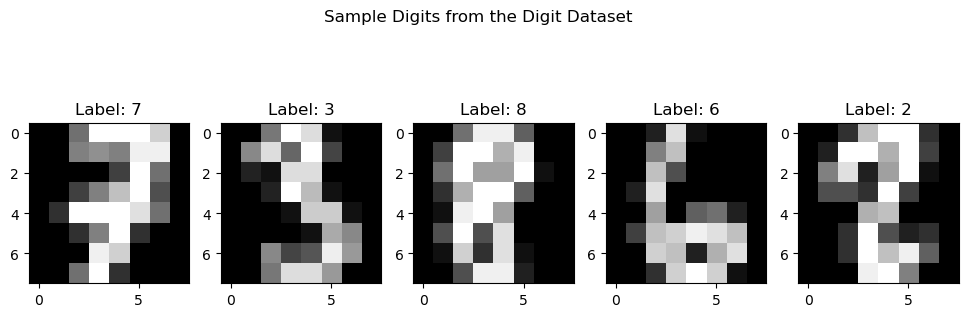

In [118]:
n_samples = 5

# Randomly select n_samples digit images
sample_indices = np.random.choice(len(X), n_samples, replace=False)

# Create a subplot for each sample digit
plt.figure(figsize=(12, 4))
for i, index in enumerate(sample_indices):
    plt.subplot(1, n_samples, i + 1)
    plt.imshow(X[index].reshape(8, 8), cmap=plt.cm.gray)
    plt.title(f"Label: {y[index]}")

plt.suptitle("Sample Digits from the Digit Dataset")
plt.show()

In [131]:

# Standardize the data (mean=0, variance=1)
scal=StandardScaler()

X_digit=scal.fit_transform(X_digit)

In [132]:

# Perform PCA
n_components = 2  # You can change this to the number of components you want to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_digit)

In [133]:

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio for {n_components} components: {explained_variance_ratio}")


Explained Variance Ratio for 2 components: [0.12033916 0.09561054]


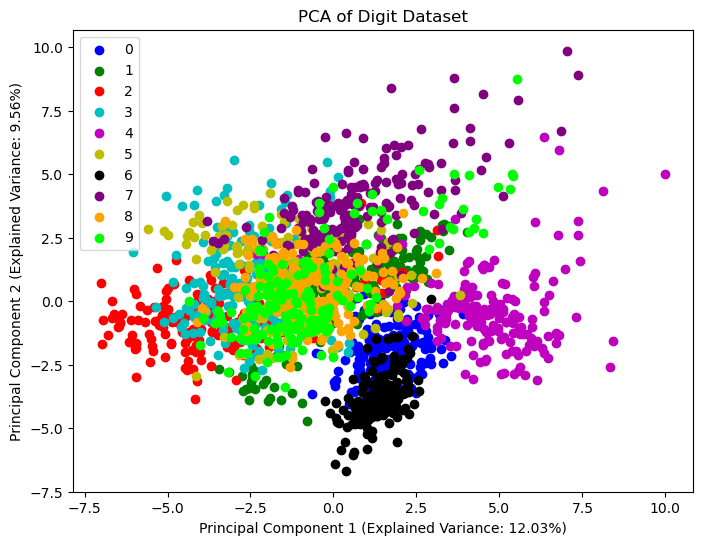

In [134]:

# Plot the PCA results
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'lime']

for i in range(10):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=str(i))

plt.title('PCA of Digit Dataset')
plt.xlabel(f'Principal Component 1 (Explained Variance: {explained_variance_ratio[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 (Explained Variance: {explained_variance_ratio[1]*100:.2f}%)')
plt.legend(loc='best')
plt.show()


<span style="color: #E91E63; font-size: 30px; font-style: italic;">Your feedback means the world to me!</span> <br><br> <span style="color: #E91E63; font-size: 30px; font-style: italic;">Feel free to upvote and comment to keep the motivation going. 🚀</span>
